# Aprendizado de Máquina - Ciência da Computação - Ufrj - 2023/1
### Professor: João Carlos Pereira da Silva
### Alunos: Jonathan Suhett Barbêdo *120021182* - Renan Mendanha Alvarino *118055604*
# Trabalho Final

In [62]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy.stats import zscore

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Carregando base de dados

#df = pd.read_csv("bodyPerformance.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bodyPerformance.csv")
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

# Pré processamento dos dados

In [65]:
# Verificar o tipo de dado das colunas do Dataset
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

Teremos que transformar os dados categóricos.

Para a coluna gender, podemos aplicar um label encoder.

Para a coluna classe, podemos criar um vetor one-hot para as instancias (essa modificação facilitará a aplicação da heuristica one-vs-rest). Entretanto, a transformação one-hot só acontecerrá após o split de treino e teste.

In [66]:
# codificando a coluna gender com valores entre 0 e 1 (M e F)
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [67]:
# Verificando novamente o tipo de dado das colunas do Dataset
df.dtypes

age                        float64
gender                       int64
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

verificando a integridade dos dados presentes nas colunas

In [68]:
# Percentual de dados faltantes na base
df.isnull().mean() *100

age                        0.0
gender                     0.0
height_cm                  0.0
weight_kg                  0.0
body fat_%                 0.0
diastolic                  0.0
systolic                   0.0
gripForce                  0.0
sit and bend forward_cm    0.0
sit-ups counts             0.0
broad jump_cm              0.0
class                      0.0
dtype: float64

In [69]:
# observando a distribuição dos dados
df.describe().transpose()

count        mean        std    min    25%    50%  \
age                      13393.0   36.775106  13.625639   21.0   25.0   32.0   
gender                   13393.0    0.632196   0.482226    0.0    0.0    1.0   
height_cm                13393.0  168.559807   8.426583  125.0  162.4  169.2   
weight_kg                13393.0   67.447316  11.949666   26.3   58.2   67.4   
body fat_%               13393.0   23.240165   7.256844    3.0   18.0   22.8   
diastolic                13393.0   78.796842  10.742033    0.0   71.0   79.0   
systolic                 13393.0  130.234817  14.713954    0.0  120.0  130.0   
gripForce                13393.0   36.963877  10.624864    0.0   27.5   37.9   
sit and bend forward_cm  13393.0   15.209268   8.456677  -25.0   10.9   16.2   
sit-ups counts           13393.0   39.771224  14.276698    0.0   30.0   41.0   
broad jump_cm            13393.0  190.129627  39.868000    0.0  162.0  193.0   

                           75%    max  
age                       48.0   64.0  
gender                     1.0    1.0  
height_cm                174.8  193.8  
weight_kg                 75.3  138.1  
body fat_%                28.0   78.4  
diastolic                 86.0  156.2  
systolic                 141.0  201.0  
gripForce                 45.2   70.5  
sit and bend forward_cm   20.7  213.0  
sit-ups counts            50.0   80.0  
broad jump_cm            221.0  303.0

Pela informação da média, podemos observar que as classes do dataset estão bem balanceadas. Portanto, ao treinar os modelos, não ocorrerá um treinamento enviesado para alguma das classes.

### Removendo outliers

Olhando para a descrição das métricas das colunas do datraframe, podemos observar a possível presença de alguns dados anômalos:
  - "height_cm" possui valor mínimo muito baixo para altura;
  - "weight_kg" possui valor mínimo muito baixo para um peso;
  - "body fat_%" possui valor máximo muito alto;
  - "sit and bend forward_cm" valor minimo negativo é permitido neste exercício, significa que você não conseguiu alcançar a ponta dos dedos na ponta dos pés. Entretanto, o valor máximo está muito alto;
  - "diastolic", "systolic", "gripForce", "sit-ups counts" e "broad jump_cm" possuem valores 0, isso pode significar que estas informações não foram coletadas, podemos substituí-las pela média para evitar a inutilização de algumas instâncias do dataset;


Substituindo valores não fornecidos (0) das colunas "diastolic", "systolic", "gripForce", "sit-ups counts" e "broad jump_cm" pela média.

In [70]:
cols = list(["diastolic", "systolic", "gripForce", "sit-ups counts", "broad jump_cm"])
count = 0
for col in cols:
  for i in df.index:
    if(df.loc[i, col] == 0):
      df.at[i, col] = df[col].mean()
      count +=1

print("valores alterados:", count)
df.describe().transpose().loc[cols]

valores alterados: 140


count        mean        std   min    25%    50%    75%  \
diastolic       13393.0   78.802725  10.720430   6.0   71.0   79.0   86.0   
systolic        13393.0  130.244541  14.670849  14.0  120.0  130.0  141.0   
gripForce       13393.0   36.972158  10.610447   1.6   27.5   37.9   45.2   
sit-ups counts  13393.0   40.144142  13.744872   1.0   31.0   41.0   50.0   
broad jump_cm   13393.0  190.271637  39.527763  20.0  162.0  193.0  221.0   

                  max  
diastolic       156.2  
systolic        201.0  
gripForce        70.5  
sit-ups counts   80.0  
broad jump_cm   303.0

Removendo outiliers em "height_cm" com a métrica z-score com cutoff 3

In [71]:
# Removendo outliers da coluna height_cm
filtered_df = df[(np.abs(zscore(df["height_cm"])) < 3)]
print("Outliers removidos:", df.count()[0] - filtered_df.count()[0])
df = filtered_df
df.describe().transpose().loc[["height_cm"]]

Outliers removidos: 6


count        mean       std    min    25%    50%    75%    max
height_cm  13387.0  168.573676  8.402106  143.4  162.4  169.2  174.8  193.8

Removendo outliers da coluna "weight_kg", para o peso, removeremos apenas valores muito baixos (valores menores que 40kg)

In [72]:
# Removendo outliers da coluna "weight_kg"
filtered_df = df[(df["weight_kg"] > 40)]
print("Outliers removidos:", df.count()[0] - filtered_df.count()[0])
df = filtered_df
df.describe().transpose().loc[["weight_kg"]]

Outliers removidos: 20


count       mean        std   min   25%   50%   75%    max
weight_kg  13367.0  67.501383  11.893978  40.3  58.2  67.5  75.4  138.1

Removendo outiliers em "body fat_%" com a métrica z-score com cutoff 3

In [73]:
# Removendo outliers da coluna height_cm
filtered_df = df[(np.abs(zscore(df["body fat_%"])) < 3)]
print("Outliers removidos:", df.count()[0] - filtered_df.count()[0])
df = filtered_df
df.describe().transpose().loc[["body fat_%"]]

Outliers removidos: 44


count       mean       std  min   25%   50%   75%   max
body fat_%  13323.0  23.153286  7.111078  3.0  18.0  22.8  28.0  44.8

Removendo outiliers em "sit and bend forward_cm" com a métrica z-score com cutoff 3

In [74]:
# Removendo outliers da coluna height_cm
filtered_df = df[(np.abs(zscore(df["sit and bend forward_cm"])) < 3)]
print("Outliers removidos:", df.count()[0] - filtered_df.count()[0])
df = filtered_df
df.describe().transpose().loc[["sit and bend forward_cm"]]

Outliers removidos: 133


count       mean       std   min   25%   50%   75%  \
sit and bend forward_cm  13190.0  15.491867  7.628574 -10.0  11.1  16.3  20.8   

                          max  
sit and bend forward_cm  40.0

# Seleção de features

Inicialmente, para escolher as features que serão utilizadas, vamos plotar a matriz de correlação.

transformando a coluna multiclasse em um vetor one-hot para observar separadamente a correlação por classe.

In [75]:
# transformando os valores da coluna class em um vetor one-hot
df_oneHot = pd.get_dummies(df)
df_oneHot.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class_A  \
0       54.9                     18.4            60.0          217.0        0   
1       36.4                     16.3            53.0          229.0        1   
2       44.8                     12.0            49.0          181.0        0   
3       41.4                     15.2            53.0          219.0        0   
4       43.5                     27.1            45.0          217.0        0   

   class_B  class_C  class_D  
0        0        1        0  
1        0        0        0  
2        0        1        0  
3        1        0        0  
4        1        0        0

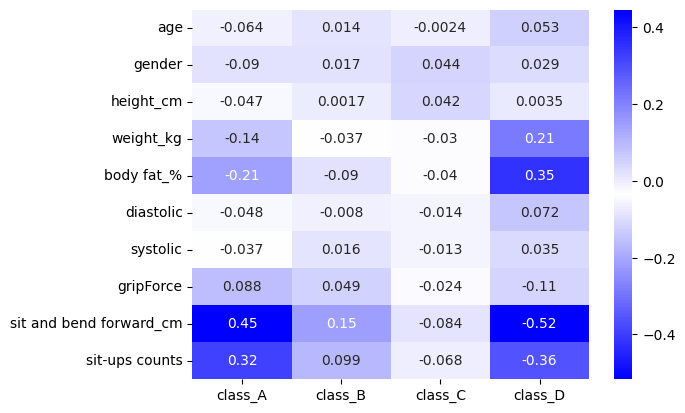

In [76]:
# gerando a matriz de correlação das features
corr = df_oneHot.corr(method = 'pearson').iloc[:11, 11:]
cmap = LinearSegmentedColormap.from_list('', ['blue', 'white', 'blue'])
sn.heatmap(corr, cmap=cmap, annot=True)
plt.show()

Tendo em vista a dificuldade de encontrar atributos com alta correlação à classe C, inicialmente optamos por usar todas as colunas como features do dataset.

In [77]:
# definindo as features e targets
features = ["age", "gender", "height_cm", "weight_kg", "body fat_%",
            "diastolic", "systolic", "gripForce", "sit and bend forward_cm",
            "sit-ups counts", "broad jump_cm"]

targets = ["class_A", "class_B", "class_C", "class_D"]

# Divisão dos dados em treinamento e teste

Temos então o dataset pronto para ser usado e separado em conjunto de treino e teste, levando em conta a utilização de validação cruzada k-fold, que nos permite subdividir o conjunto de treino para obter dados de validação para cada fold. Além disso, estaremos normalizando os dados de entrada (z-score norm).

In [78]:
# Normalizando os dados
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df[features]), columns = list(df[features].columns.values))
X.describe().transpose()

count          mean       std       min       25%  \
age                      13190.0 -1.303649e-16  1.000038 -1.156264 -0.862564   
gender                   13190.0 -1.352132e-16  1.000038 -1.310476 -1.310476   
height_cm                13190.0 -7.601030e-16  1.000038 -3.009751 -0.738390   
weight_kg                13190.0  5.158034e-16  1.000038 -2.289989 -0.780041   
body fat_%               13190.0  3.372250e-16  1.000038 -2.832112 -0.722357   
diastolic                13190.0  1.182981e-15  1.000038 -6.794442 -0.728721   
systolic                 13190.0  9.944366e-16  1.000038 -7.924467 -0.699129   
gripForce                13190.0  4.697447e-16  1.000038 -3.346039 -0.891823   
sit and bend forward_cm  13190.0  9.750435e-17  1.000038 -3.341756 -0.575735   
sit-ups counts           13190.0  1.077396e-17  1.000038 -2.879961 -0.682593   
broad jump_cm            13190.0 -4.460420e-16  1.000038 -3.969065 -0.706529   

                              50%       75%       max  
age                     -0.348588  0.826213  2.001014  
gender                   0.763082  0.763082  0.763082  
height_cm                0.074518  0.732017  3.015332  
weight_kg                0.001142  0.660581  5.978371  
body fat_%              -0.061300  0.670082  3.047072  
diastolic                0.017830  0.671061  7.222040  
systolic                -0.017494  0.732305  4.822119  
gripForce                0.089864  0.769493  3.157633  
sit and bend forward_cm  0.105939  0.695849  3.212797  
sit-ups counts           0.123109  0.782320  2.906443  
broad jump_cm            0.083617  0.797296  2.861870

Utilizando 75% do dataset para treino e validação.

In [79]:
# Divisão em treinamento e teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, df_oneHot[targets], test_size=0.25, stratify=df["class"])

In [80]:
# observando distribuição de cada classe no conjunto de treino
y_train.sum()

class_A    2502
class_B    2507
class_C    2510
class_D    2373
dtype: int64

In [81]:
# observando distribuição de cada classe no conjunto de teste
y_test.sum()

class_A    834
class_B    836
class_C    837
class_D    791
dtype: int64

# Criação do modelo Multi Layer Perceptron

In [82]:
# TODO: verificar parâmetros
Epochs = 100
MLP_model = MLPClassifier(hidden_layer_sizes = [4],
                      activation = "identity",
                      solver = "adam",
                      learning_rate_init = 0.01,
                      max_iter = Epochs,
                      tol = 1e-6, # tolerancia para o otimizador determinar convergência da função Loss
                      n_iter_no_change = 50, # determina convergência se a mudança da função Loss é menor que tol durante 50 iterações
                      verbose = False)

### Treinamento do modelo

In [83]:
# Funções para o treinamento do modelo

# função que exibe as métiricas do treinamento k-fold de um modelo
def printMetrics(KFmetrics):
  acc_train_fold, acc_valid_fold, train_fold_f1, valid_fold_f1 = KFmetrics
  print("Acurácia por fold ")
  print("Conjunto de treino:     ", list(np.around(acc_train_fold,2)))
  print("Conjunto de validação: ", list(np.around(acc_valid_fold,2)))

  print("\nAcurácia média no Conjunto de treino:     ", np.around(np.mean(acc_train_fold),2))
  print("Acurácia média no Conjunto de validação: ", np.around(np.mean(acc_valid_fold),2))

  print("\nF1-Score macro avg por fold")
  print("Conjunto de treino:     ", list(np.around(train_fold_f1,2)))
  print("Conjunto de validação: ", list(np.around(valid_fold_f1,2)))

  print("\nF1-Score médio no Conjunto de treino:     ", np.around(np.mean(train_fold_f1),2))
  print("F1-Score médio no Conjunto de validação: ", np.around(np.mean(valid_fold_f1),2))

# função que realiza o K-fold e obtém as métricas do classificador gerado pelo modelo
def runKFold(model, kf_splits, X_train, y_train):
  kf = StratifiedKFold(n_splits=kf_splits, shuffle = True)

  # guarda cada uma das acurácias
  acc_train_fold = []
  acc_valid_fold = []

  # guarda cada um dos f1 scores
  train_fold_f1 = []
  valid_fold_f1 = []

  # variáveis temporárias para guardar os dados obtidos em um fold
  X_train_fold, X_valid_fold = [],[]
  y_train_fold, y_valid_fold = [],[]

  # guarda os valores de loss por época de cada fold
  lossCurves = []

  # revertendo as variáveis dummy para a estratificação do KFold
  y_train_classes = y_train.idxmax(axis=1)
  for train_index, valid_index in kf.split(X_train, y_train_classes):
    # dividindo os conjuntos de teste e validação
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    classifier = model.fit(X_train_fold, y_train_fold)

    # guardado a loss curve do fold
    lossCurves.append(classifier.loss_curve_)

    # obtendo as predições como probabilidades
    y_pred_train = classifier.predict_proba(X_train_fold)
    y_pred_valid = classifier.predict_proba(X_valid_fold)
    # indicando a maior probabilidade como a provável predição
    for row in range(y_pred_train.shape[0]):
      for col in range(y_pred_train.shape[1]):
        if(y_pred_train[row, col] == y_pred_train[row, :].max()):
          y_pred_train[row, col] = 1
        else:
          y_pred_train[row, col] = 0
    for row in range(y_pred_valid.shape[0]):
      for col in range(y_pred_valid.shape[1]):
        if(y_pred_valid[row, col] == y_pred_valid[row, :].max()):
          y_pred_valid[row, col] = 1
        else:
          y_pred_valid[row, col] = 0

    # transformando os dados de one-hot para classes
    y_pred_train = pd.DataFrame(y_pred_train, columns = targets).idxmax(axis=1)

    y_pred_valid = pd.DataFrame(y_pred_valid, columns = targets).idxmax(axis=1)

    y_train_fold = pd.DataFrame(y_train_fold, columns = targets).idxmax(axis=1)

    y_valid_fold = pd.DataFrame(y_valid_fold, columns = targets).idxmax(axis=1)

    # valores de acurácia
    acc_train = metrics.accuracy_score(y_train_fold, y_pred_train)
    acc_valid = metrics.accuracy_score(y_valid_fold, y_pred_valid)

    # adiciona a acurácia à lista
    acc_train_fold.append(acc_train)
    acc_valid_fold.append(acc_valid)

    # valores de f1
    f1_train = metrics.f1_score(y_train_fold, y_pred_train, average = "macro")
    f1_valid = metrics.f1_score(y_valid_fold, y_pred_valid, average = "macro")

    # adiciona o f1 à lista
    train_fold_f1.append(f1_train)
    valid_fold_f1.append(f1_valid)

  # cria a matriz de confusão do conjunto de validação do ultimo fold
  #print(y_valid_fold)
  cm = metrics.confusion_matrix(y_valid_fold.to_numpy(), y_pred_valid.to_numpy(), labels = targets)

  return classifier, lossCurves, cm, (acc_train_fold, acc_valid_fold, train_fold_f1, valid_fold_f1)

In [84]:
# rodando o k-fold para o modelo criado anteriromente
kf_splits=4
MLP_classifier, MLP_lossCurves, MLP_cm, MLP_KFmetrics = runKFold(MLP_model, kf_splits, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
# printando métricas de treino
printMetrics(MLP_KFmetrics)

Acurácia por fold 
Conjunto de treino:      [0.59, 0.59, 0.58, 0.58]
Conjunto de validação:  [0.56, 0.58, 0.6, 0.59]

Acurácia média no Conjunto de treino:      0.58
Acurácia média no Conjunto de validação:  0.58

F1-Score macro avg por fold
Conjunto de treino:      [0.57, 0.57, 0.55, 0.56]
Conjunto de validação:  [0.53, 0.56, 0.57, 0.57]

F1-Score médio no Conjunto de treino:      0.56
F1-Score médio no Conjunto de validação:  0.56


In [86]:
# Função que plota o gráfico Loss por época
def lossPlot(lossCurves, max_epoch):
  fig, ax = plt.subplots()
  fold = 1
  for curve in lossCurves:
    epoch = range(1, max_epoch+1)
    convergence = curve[-1]
    for _ in range(max_epoch-len(curve)):
      curve.append(convergence)
    ax.plot(epoch, curve, label = 'Fold ' + str(fold) + ' Loss')
    fold += 1

  # finalziando o plot
  plt.title('Função Loss por Época')
  plt.xlabel('Época') #x label
  plt.ylabel('Loss') #y label
  plt.yscale('linear')
  plt.legend()
  plt.show()

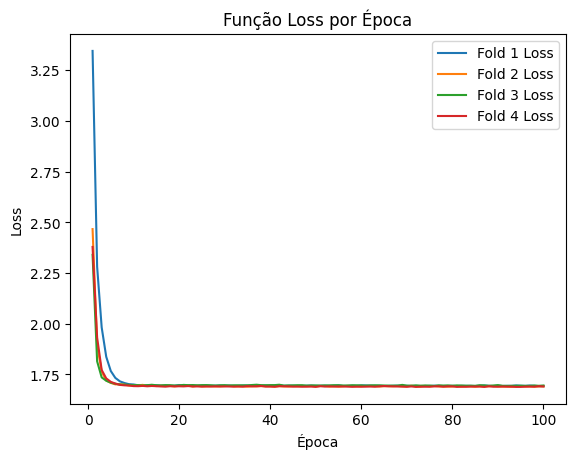

In [87]:
# Plotando a curva de perda de cada fold
lossPlot(MLP_lossCurves, Epochs)

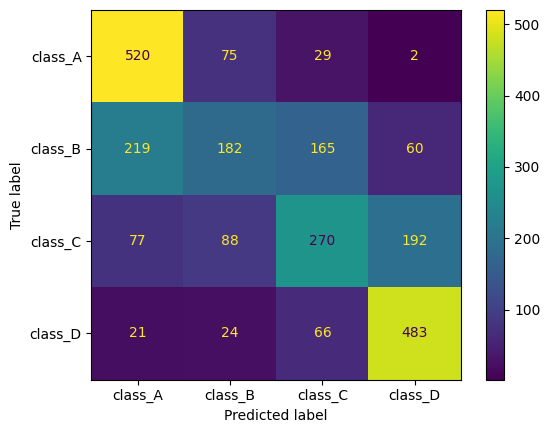

In [88]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= MLP_cm, display_labels= targets)
disp.plot();

### Ajustando os parâmetros para tentar melhorar os resultados

In [89]:
Epochs = 30
MLP_best_model = MLPClassifier(hidden_layer_sizes = [16,16],
                      activation = "identity",
                      solver = "adam",
                      learning_rate_init = 0.01,
                      max_iter = Epochs,
                      tol = 1e-6, # tolerancia para o otimizador determinar convergência da função Loss
                      n_iter_no_change = 50, # determina convergência se a mudança da função Loss é menor que tol durante 50 iterações
                      verbose = False)

MLP_best_classifier, MLP_best_lossCurves, MLP_best_cm, MLP_best_KFmetrics = runKFold(MLP_best_model, kf_splits, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
printMetrics(MLP_best_KFmetrics)

Acurácia por fold 
Conjunto de treino:      [0.57, 0.58, 0.57, 0.59]
Conjunto de validação:  [0.59, 0.58, 0.57, 0.57]

Acurácia média no Conjunto de treino:      0.58
Acurácia média no Conjunto de validação:  0.58

F1-Score macro avg por fold
Conjunto de treino:      [0.55, 0.54, 0.54, 0.58]
Conjunto de validação:  [0.57, 0.55, 0.53, 0.55]

F1-Score médio no Conjunto de treino:      0.55
F1-Score médio no Conjunto de validação:  0.55


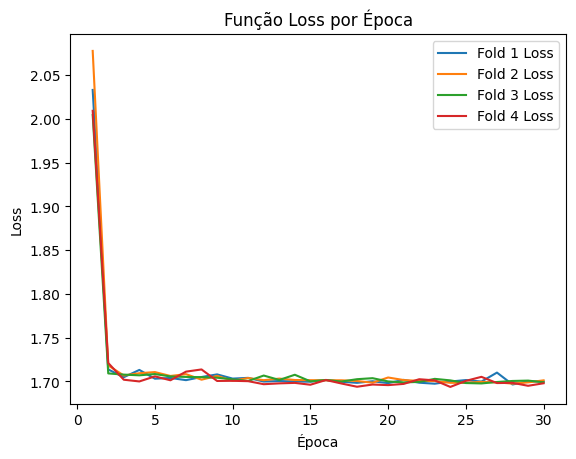

In [91]:
# Plotando a curva de perda de cada fold
lossPlot(MLP_best_lossCurves, Epochs)

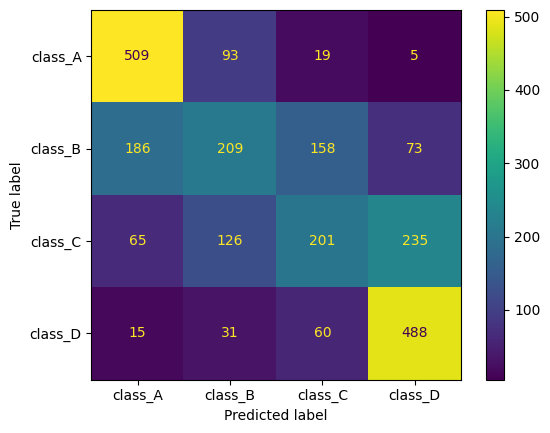

In [92]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= MLP_best_cm, display_labels= targets)
disp.plot();

# Criação do modelo de regressão logística

In [93]:
# criação do modelo de regressão logística usando o algoritmo one versus rest
LR_model = LogisticRegression(multi_class='ovr', solver='liblinear')

In [94]:
# Funções para o treinamento do modelo

# função que realiza o K-fold e obtém as métricas do classificador gerado pelo modelo
def runKFold(model, kf_splits, X_train, y_train):
  kf = StratifiedKFold(n_splits=kf_splits, shuffle = True)

  # guarda cada uma das acurácias
  acc_train_fold = []
  acc_valid_fold = []

  # guarda cada um dos f1 scores
  train_fold_f1 = []
  valid_fold_f1 = []

  # variáveis temporárias para guardar os dados obtidos em um fold
  X_train_fold, X_valid_fold = [],[]
  y_train_fold, y_valid_fold = [],[]

  # revertendo as variáveis dummy para a estratificação do KFold
  y_train_classes = y_train.idxmax(axis=1)
  for train_index, valid_index in kf.split(X_train, y_train_classes):
    # dividindo os conjuntos de teste e validação
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    y_train_fold_classes = y_train_fold.idxmax(axis=1)
    classifier = model.fit(X_train_fold, y_train_fold_classes)

    # obtendo as predições como probabilidades
    y_pred_train = classifier.predict_proba(X_train_fold)
    y_pred_valid = classifier.predict_proba(X_valid_fold)
    # indicando a maior probabilidade como a provável predição
    for row in range(y_pred_train.shape[0]):
      for col in range(y_pred_train.shape[1]):
        if(y_pred_train[row, col] == y_pred_train[row, :].max()):
          y_pred_train[row, col] = 1
        else:
          y_pred_train[row, col] = 0
    for row in range(y_pred_valid.shape[0]):
      for col in range(y_pred_valid.shape[1]):
        if(y_pred_valid[row, col] == y_pred_valid[row, :].max()):
          y_pred_valid[row, col] = 1
        else:
          y_pred_valid[row, col] = 0

    # transformando os dados de one-hot para classes
    y_pred_train = pd.DataFrame(y_pred_train, columns = targets).idxmax(axis=1)

    y_pred_valid = pd.DataFrame(y_pred_valid, columns = targets).idxmax(axis=1)

    y_train_fold = pd.DataFrame(y_train_fold, columns = targets).idxmax(axis=1)

    y_valid_fold = pd.DataFrame(y_valid_fold, columns = targets).idxmax(axis=1)

    # valores de acurácia
    acc_train = metrics.accuracy_score(y_train_fold, y_pred_train)
    acc_valid = metrics.accuracy_score(y_valid_fold, y_pred_valid)

    # adiciona a acurácia à lista
    acc_train_fold.append(acc_train)
    acc_valid_fold.append(acc_valid)

    # valores de f1
    f1_train = metrics.f1_score(y_train_fold, y_pred_train, average = "macro")
    f1_valid = metrics.f1_score(y_valid_fold, y_pred_valid, average = "macro")

    # adiciona o f1 à lista
    train_fold_f1.append(f1_train)
    valid_fold_f1.append(f1_valid)

  # cria a matriz de confusão do conjunto de validação do ultimo fold
  #print(y_valid_fold)
  cm = metrics.confusion_matrix(y_valid_fold.to_numpy(), y_pred_valid.to_numpy(), labels = targets)

  return classifier, cm, (acc_train_fold, acc_valid_fold, train_fold_f1, valid_fold_f1)

In [95]:
LR_classifier, LR_cm, LR_KFmetrics = runKFold(LR_model, kf_splits, X_train, y_train)

In [96]:
# printando métricas de treino
printMetrics(LR_KFmetrics)

Acurácia por fold 
Conjunto de treino:      [0.59, 0.59, 0.59, 0.59]
Conjunto de validação:  [0.57, 0.59, 0.59, 0.58]

Acurácia média no Conjunto de treino:      0.59
Acurácia média no Conjunto de validação:  0.58

F1-Score macro avg por fold
Conjunto de treino:      [0.57, 0.57, 0.57, 0.57]
Conjunto de validação:  [0.55, 0.57, 0.57, 0.57]

F1-Score médio no Conjunto de treino:      0.57
F1-Score médio no Conjunto de validação:  0.56


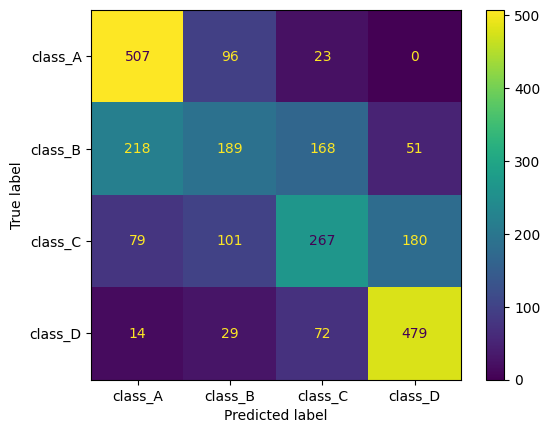

In [97]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= LR_cm, display_labels= targets)
disp.plot();

## Criação do modelo de Árvore de Decisão

In [98]:
# Criação do classificador de árvore de decisão
CLF_model = DecisionTreeClassifier(criterion="entropy")

In [99]:
CLF_classifier, CLF_cm, CLF_KFmetrics = runKFold(CLF_model, kf_splits, X_train, y_train)

In [100]:
# printando métricas de treino
printMetrics(CLF_KFmetrics)

Acurácia por fold 
Conjunto de treino:      [1.0, 1.0, 1.0, 1.0]
Conjunto de validação:  [0.62, 0.62, 0.61, 0.63]

Acurácia média no Conjunto de treino:      1.0
Acurácia média no Conjunto de validação:  0.62

F1-Score macro avg por fold
Conjunto de treino:      [1.0, 1.0, 1.0, 1.0]
Conjunto de validação:  [0.63, 0.62, 0.61, 0.63]

F1-Score médio no Conjunto de treino:      1.0
F1-Score médio no Conjunto de validação:  0.62


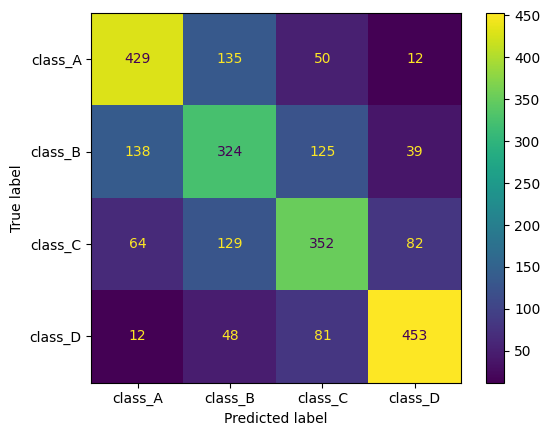

In [101]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= CLF_cm, display_labels= targets)
disp.plot();

### Árvore de Decisão podada

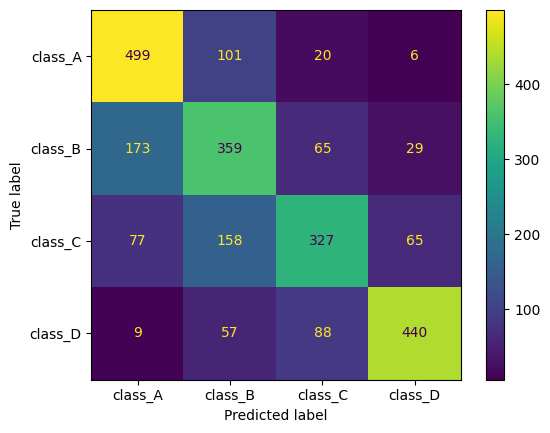

In [102]:
CLF_best_model = DecisionTreeClassifier(criterion="entropy", max_depth=None, max_leaf_nodes=250)
CLF_best_classifier, CLF_best_cm, CLF_best_KFmetrics = runKFold(CLF_best_model, kf_splits, X_train, y_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= CLF_best_cm, display_labels= targets)
disp.plot();

In [103]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import io

dot_data = io.StringIO()
export_graphviz(CLF_best_classifier, out_file=dot_data, max_depth=None, filled=True, rounded=True, special_characters=True, feature_names = X.columns, class_names=['A','B','C','D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Avaliação dos resultados

## Multi layer Perceptron

In [104]:
y_pred = MLP_classifier.predict(X_test)

In [105]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       834
           1       0.43      0.00      0.01       836
           2       0.26      0.01      0.01       837
           3       0.80      0.69      0.74       791

   micro avg       0.74      0.32      0.44      3298
   macro avg       0.55      0.32      0.35      3298
weighted avg       0.55      0.32      0.34      3298
 samples avg       0.31      0.32      0.31      3298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


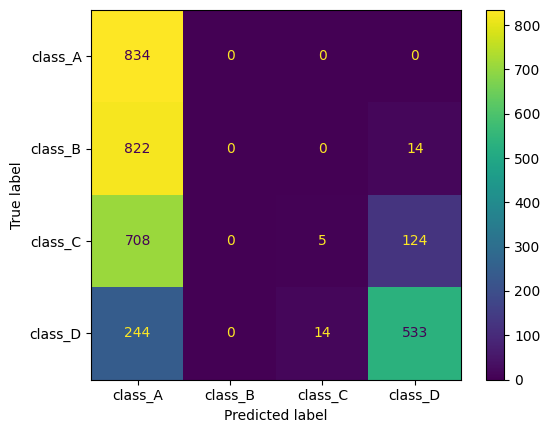

In [106]:
# transformando os dados de one-hot para classes
y_pred_classes = pd.DataFrame(y_pred, columns = targets).idxmax(axis=1)

y_test_classes = pd.DataFrame(y_test, columns = targets).idxmax(axis=1)


# cria a matriz de confusão
MLP_cm = metrics.confusion_matrix(y_test_classes.to_numpy(), y_pred_classes.to_numpy(), labels = targets)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= MLP_cm, display_labels= targets)
disp.plot();

### Multi layer Perceptron refinado

In [107]:
y_pred = MLP_best_classifier.predict(X_test)

In [108]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       834
           1       0.50      0.00      0.00       836
           2       0.18      0.01      0.02       837
           3       0.77      0.72      0.75       791

   micro avg       0.74      0.31      0.43      3298
   macro avg       0.55      0.31      0.34      3298
weighted avg       0.54      0.31      0.34      3298
 samples avg       0.30      0.31      0.30      3298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


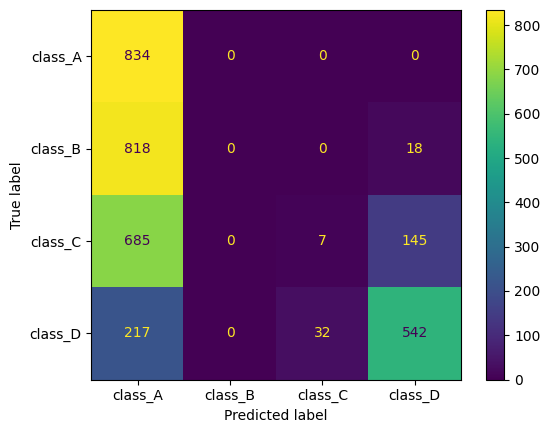

In [109]:
# transformando os dados de one-hot para classes
y_pred_classes = pd.DataFrame(y_pred, columns = targets).idxmax(axis=1)

y_test_classes = pd.DataFrame(y_test, columns = targets).idxmax(axis=1)


# cria a matriz de confusão
MLP_best_cm = metrics.confusion_matrix(y_test_classes.to_numpy(), y_pred_classes.to_numpy(), labels = targets)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= MLP_best_cm, display_labels= targets)
disp.plot();

## Regressão Logística

In [110]:
y_pred = LR_classifier.predict(X_test)
y_pred = pd.get_dummies(pd.DataFrame(y_pred))

In [111]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       834
           1       0.48      0.32      0.38       836
           2       0.47      0.39      0.43       837
           3       0.64      0.80      0.71       791

   micro avg       0.58      0.58      0.58      3298
   macro avg       0.56      0.58      0.56      3298
weighted avg       0.56      0.58      0.56      3298
 samples avg       0.58      0.58      0.58      3298



In [112]:
# transformando os dados de one-hot para classes
y_pred_classes = pd.DataFrame(y_pred.to_numpy(), columns = targets).idxmax(axis=1)

y_test_classes = pd.DataFrame(y_test, columns = targets).idxmax(axis=1)

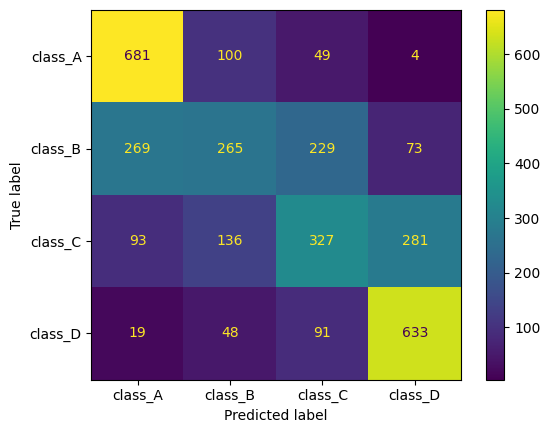

In [113]:
# cria a matriz de confusão
LR_cm = metrics.confusion_matrix(y_test_classes.to_numpy(), y_pred_classes.to_numpy(), labels = targets)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= LR_cm, display_labels= targets)
disp.plot();

## Árvore de Decisão

In [114]:
y_pred = CLF_classifier.predict(X_test)
y_pred = pd.get_dummies(pd.DataFrame(y_pred))

In [115]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       834
           1       0.47      0.51      0.49       836
           2       0.56      0.57      0.57       837
           3       0.77      0.75      0.76       791

   micro avg       0.61      0.61      0.61      3298
   macro avg       0.62      0.62      0.62      3298
weighted avg       0.62      0.61      0.62      3298
 samples avg       0.61      0.61      0.61      3298



In [116]:
# transformando os dados de one-hot para classes
y_pred_classes = pd.DataFrame(y_pred.to_numpy(), columns = targets).idxmax(axis=1)

y_test_classes = pd.DataFrame(y_test, columns = targets).idxmax(axis=1)

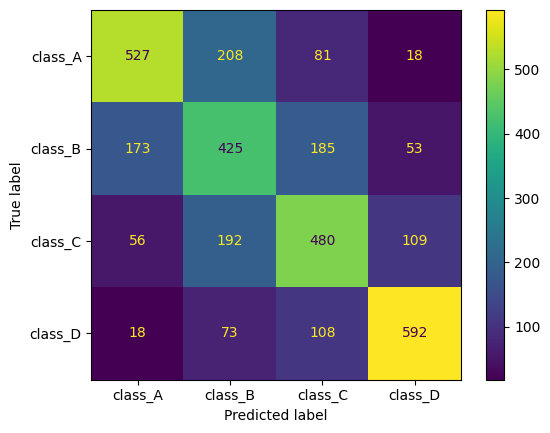

In [117]:
# cria a matriz de confusão
CLF_cm = metrics.confusion_matrix(y_test_classes.to_numpy(), y_pred_classes.to_numpy(), labels = targets)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= CLF_cm, display_labels= targets)
disp.plot();

#### Árvore de Decisão podada

In [118]:
y_pred = CLF_best_classifier.predict(X_test)
y_pred = pd.get_dummies(pd.DataFrame(y_pred))

In [119]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       834
           1       0.53      0.57      0.55       836
           2       0.66      0.57      0.61       837
           3       0.84      0.70      0.77       791

   micro avg       0.66      0.66      0.66      3298
   macro avg       0.67      0.66      0.66      3298
weighted avg       0.67      0.66      0.66      3298
 samples avg       0.66      0.66      0.66      3298



In [120]:
# transformando os dados de one-hot para classes
y_pred_classes = pd.DataFrame(y_pred.to_numpy(), columns = targets).idxmax(axis=1)

y_test_classes = pd.DataFrame(y_test, columns = targets).idxmax(axis=1)

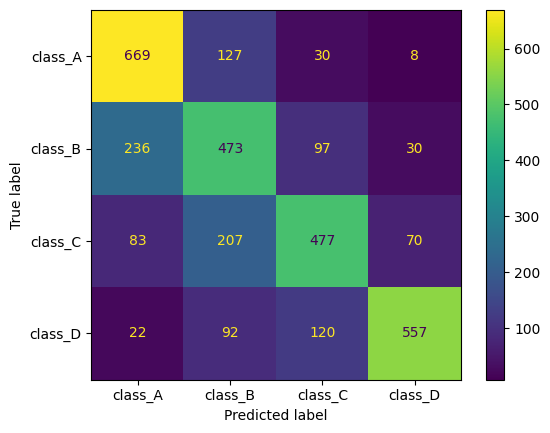

In [121]:
# cria a matriz de confusão
CLF_cm = metrics.confusion_matrix(y_test_classes.to_numpy(), y_pred_classes.to_numpy(), labels = targets)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= CLF_cm, display_labels= targets)
disp.plot();